In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import signal
from scipy.signal import argrelextrema
from dataread import *
from plots import *
import featuregeneration as fg

In [6]:
train_df = preprocess(get_train_df())
train_df

,,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
ID,LABEL,,,,,,,,,,,,,,,,,,,,,
0,2,0.736523,0.730081,0.689200,0.658990,0.650918,0.596280,0.589561,0.614529,0.625039,0.573526,...,0.626207,0.610756,0.610756,0.692428,0.707468,0.735683,0.701533,0.715714,0.679562,0.650931
1,2,0.532753,0.540847,0.501242,0.530814,0.467952,0.478370,0.456348,0.458303,0.460483,0.477457,...,0.589813,0.543444,0.543444,0.555176,0.587280,0.596288,0.576317,0.605424,0.620715,0.627014
2,2,0.654833,0.656359,0.646036,0.638216,0.619388,0.623831,0.623133,0.633317,0.610135,0.632386,...,0.373689,0.413233,0.413233,0.393135,0.397327,0.409395,0.401551,0.393591,0.374466,0.362068
3,2,0.931470,0.964146,0.893628,0.887021,0.917724,0.909832,0.924910,0.907656,0.909394,0.926476,...,0.429184,0.414404,0.414404,0.467293,0.451605,0.400407,0.406513,0.393142,0.393080,0.442132
4,2,0.256688,0.254720,0.252393,0.261119,0.274858,0.283299,0.296523,0.287606,0.299731,0.306570,...,0.444330,0.514840,0.514840,0.531093,0.499437,0.501346,0.515554,0.521064,0.511134,0.475003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,0.192662,0.190720,0.216761,0.182729,0.236480,0.236040,0.222772,0.270841,0.304433,0.339326,...,0.617571,0.630967,0.648725,0.646325,0.647644,0.639196,0.316290,0.329943,0.367017,0.396430
5083,1,0.904041,0.861872,0.869355,0.845140,0.803833,0.744330,0.735784,0.677318,0.691825,0.645488,...,0.470030,0.479281,0.448762,0.465187,0.415651,0.423198,0.497589,0.524174,0.461856,0.496543
5084,1,0.457990,0.460240,0.452298,0.440223,0.461572,0.453846,0.447998,0.448955,0.440521,0.440965,...,0.311459,0.298246,0.300774,0.339675,0.332339,0.322856,0.356632,0.367707,0.363143,0.363319


In [7]:
test_df = preprocess(get_test_df())
test_df

,,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
ID,LABEL,,,,,,,,,,,,,,,,,,,,,
0,2,0.656909,0.611783,0.580238,0.493565,0.487692,0.472252,0.424488,0.397899,0.397096,0.331483,...,0.415196,0.426140,0.415013,0.378169,0.412466,0.486269,0.455138,0.463970,1.000000,0.514304
1,2,0.827188,0.824631,0.825831,0.824125,0.822106,0.819824,0.819491,0.815515,0.814186,0.807785,...,0.385840,0.357747,0.340508,0.314694,0.299042,0.282513,0.268207,0.261207,0.266190,0.284360
2,2,1.000000,0.979432,0.943295,0.870852,0.817896,0.737064,0.692346,0.633042,0.514403,0.471110,...,0.370029,0.317081,0.319649,0.310733,0.293884,0.223438,0.283878,0.232476,0.328413,0.379791
3,2,0.595693,0.595294,0.589562,0.592637,0.620225,0.608282,0.606292,0.619920,0.631187,0.640320,...,0.884692,0.875760,0.875760,0.868379,0.850399,0.853733,0.853581,0.810594,0.768921,0.781765
4,2,0.843396,0.853817,0.856773,0.858000,0.853707,0.850223,0.860406,0.840920,0.858585,0.867233,...,0.844144,0.833596,0.848859,0.851485,0.845952,0.823263,0.824970,0.833539,0.830301,0.852955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,0.931181,0.914119,0.911937,0.918409,0.887849,0.873149,0.864869,0.858209,0.846925,0.836995,...,0.755623,0.740341,0.720762,0.725250,0.735667,0.740366,0.716102,0.723868,0.726561,0.730763
566,1,0.132812,0.143314,0.145860,0.141814,0.149828,0.114710,0.113585,0.124561,0.110723,0.112835,...,0.109045,0.121698,0.098109,0.109914,0.109617,0.106518,0.126436,0.123021,0.111848,0.111335
567,1,0.040026,0.074265,0.084315,0.078805,0.090414,0.140976,0.119282,0.141565,0.181730,0.175977,...,0.224667,0.221514,0.232673,0.210493,0.185854,0.167799,0.212469,0.246153,0.277308,0.292002


In [8]:
standarized_train_df = preprocess(get_train_df(), 'standarize')
standarized_train_df

,,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
ID,LABEL,,,,,,,,,,,,,,,,,,,,,
0,2,0.522056,0.459581,0.063136,-0.229826,-0.308107,-0.837965,-0.903117,-0.660993,-0.559066,-1.058620,...,-0.547741,-0.697583,-0.697583,0.094436,0.240295,0.513904,0.182735,0.320256,-0.030328,-0.307983
1,2,-0.524187,-0.440022,-0.851845,-0.544353,-1.198002,-1.089671,-1.318665,-1.298332,-1.275666,-1.099171,...,0.069130,-0.413023,-0.413023,-0.291027,0.042798,0.136462,-0.071199,0.231459,0.390455,0.455953
2,2,1.860861,1.872499,1.793764,1.734119,1.590523,1.624408,1.619086,1.696756,1.519949,1.689660,...,-0.283428,0.018170,0.018170,-0.135113,-0.103143,-0.011103,-0.070925,-0.131635,-0.277502,-0.372062
3,2,3.208277,3.410461,2.974123,2.933240,3.123218,3.074391,3.167685,3.060925,3.071679,3.177373,...,0.100333,0.008880,0.008880,0.336134,0.239062,-0.077729,-0.039947,-0.122681,-0.123068,0.180451
4,2,-2.685048,-2.698265,-2.713889,-2.655298,-2.563051,-2.506376,-2.417592,-2.477461,-2.396047,-2.350133,...,-1.425177,-0.951756,-0.951756,-0.842631,-1.055181,-1.042357,-0.946965,-0.909968,-0.976641,-1.219236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-1.437553,-1.452149,-1.256476,-1.512187,-1.108309,-1.111614,-1.211310,-0.850119,-0.597713,-0.335530,...,1.755186,1.855846,1.989278,1.971239,1.981154,1.917674,-0.508621,-0.406033,-0.127464,0.093547
5083,1,4.698189,4.225453,4.309334,4.037872,3.574808,2.907741,2.811940,2.156507,2.319144,1.799682,...,-0.167287,-0.063586,-0.405713,-0.221579,-0.776902,-0.692304,0.141662,0.439694,-0.258923,0.129932
5084,1,4.407335,4.482461,4.217320,3.814150,4.526950,4.268980,4.073750,4.105691,3.824091,3.838921,...,-0.484974,-0.926114,-0.841699,0.457115,0.212182,-0.104455,1.023248,1.393011,1.240640,1.246507


There is an exoplanet


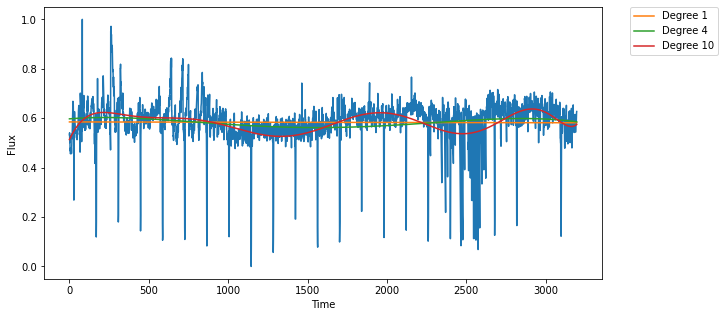

In [9]:
plot_row(train_df, 1)

There is an exoplanet


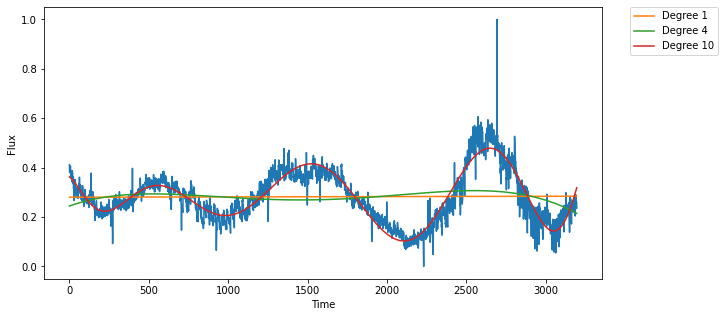

In [10]:
plot_row(train_df, 5)

There's no exoplanet


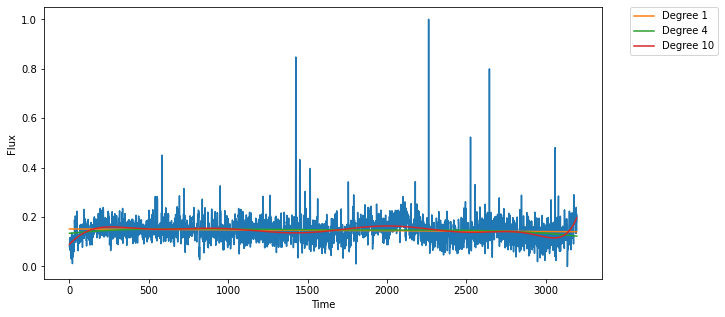

In [11]:
plot_row(train_df, 500)

There's no exoplanet


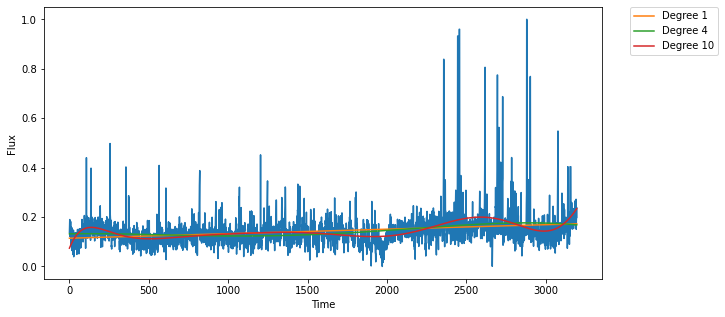

In [12]:
plot_row(train_df, 2000)

In [13]:
features = fg.get_df(train_df, standarized_train_df)
features

,Label,Standard deviation,Variance,Mean,"Spikes (from mean, multiplier = 1.9)"
0,2,0.103135,0.010637,0.682690,19
1,2,0.096185,0.009252,0.583164,30
2,2,0.131133,0.017196,0.410850,23
3,2,0.161639,0.026127,0.412969,15
4,2,0.148961,0.022189,0.656592,14
...,...,...,...,...,...
5082,1,0.133107,0.017717,0.383980,16
5083,1,0.089216,0.007960,0.484953,21
5084,1,0.029956,0.000897,0.325984,11
5085,1,0.020258,0.000410,0.031780,0


Standard deviation


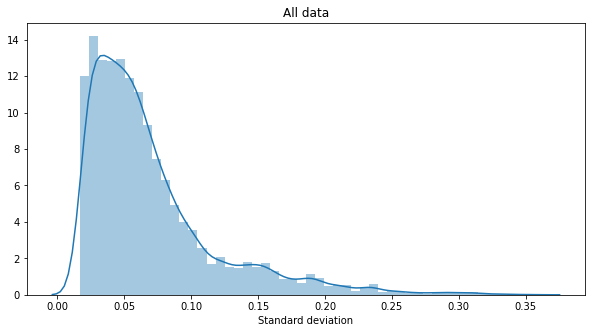

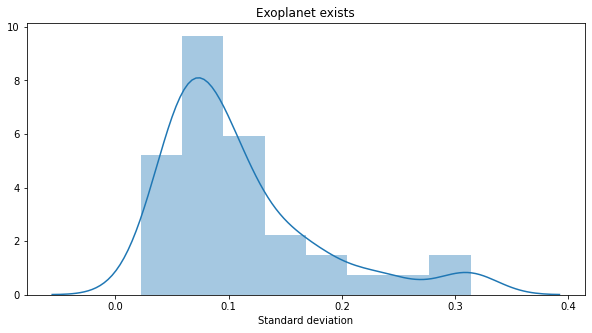

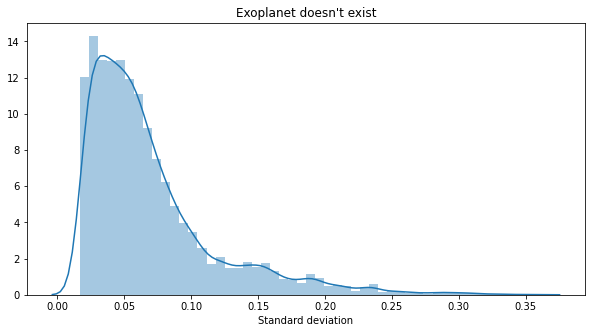

Variance


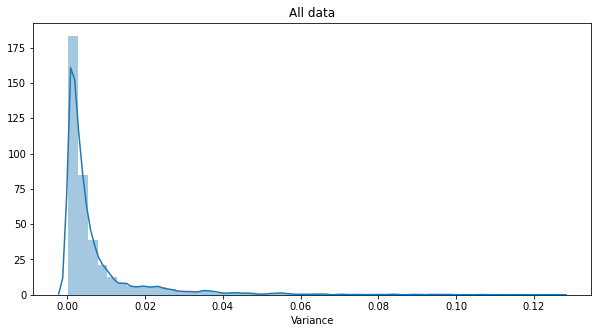

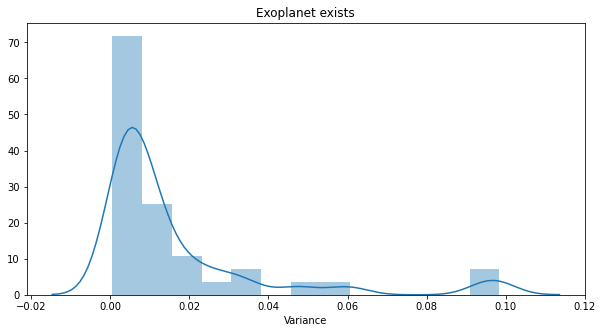

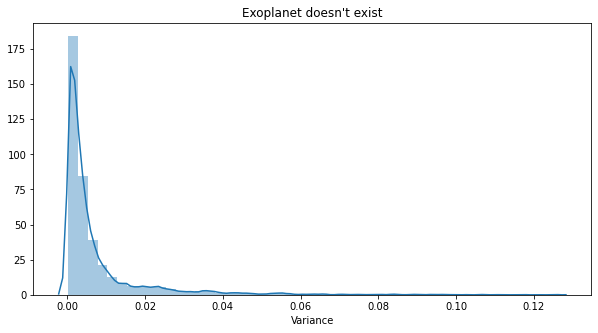

Mean


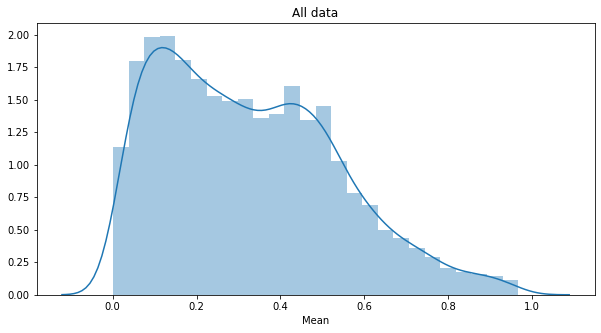

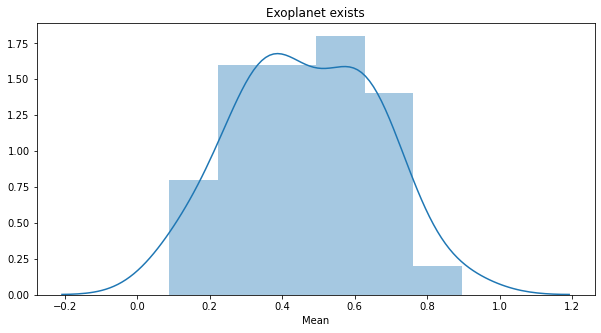

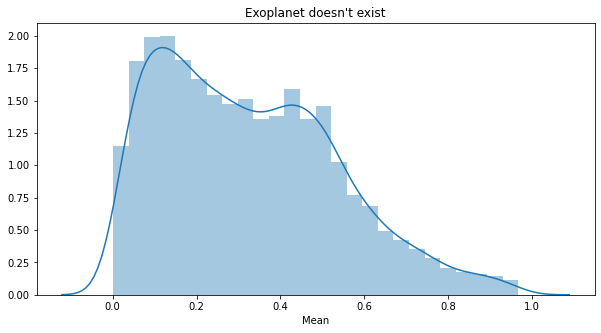

Spikes (from mean, multiplier = 1.9)


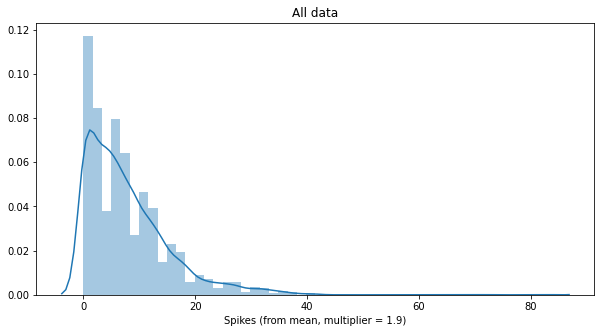

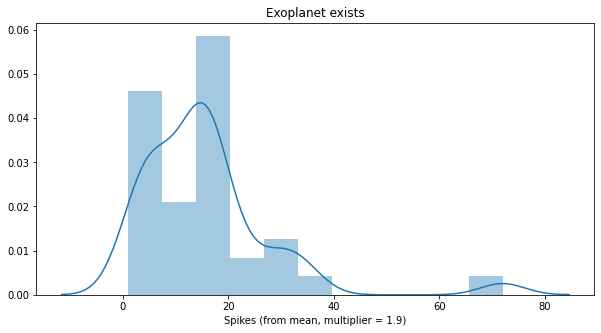

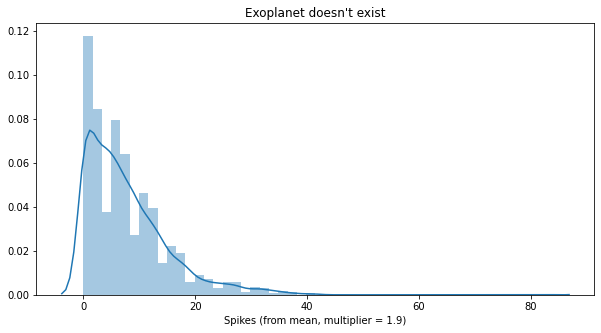

In [14]:
plot_histograms(features)